In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [26]:
random.seed(1)
pokemon=pd.read_csv('pokemon.csv')
pokemon=pokemon.rename(index=str,columns = {'#': 'Number'})
combat = pd.read_csv('combats.csv')
print("\nPokemon Data")
print(pokemon.head())
print("\nCombat Data")
print(combat.head())
print("\n")
print("Dimensions of Pokemon: " + str(pokemon.shape))
print("Dimensions of Combat: " + str(combat.shape))
print("\nMissing Values:")
print(pokemon.isnull().sum())
print(combat.isnull().sum())
print("\nFinding the missing Pokemon: ")
print("This pokemon is before the missing pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing pokemon: " + pokemon['Name'][63])
print("\nThe missing Pokemon is Primeape")
print("\n")
total_Wins = combat.Winner.value_counts() #adding to dataset
numberOfWins = combat.groupby('Winner').count() #getting # of wins for each pokemon

countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()

print("Looking at the dimensions of our dataframes: ")
print("\nCount by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total wins shape: " + str(total_Wins.shape))

find_losing_pokemon = np.setdiff1d(countByFirst.index.values, numberOfWins.index.values) - 1
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print("\nThe Pokemon that lost the most fights: " + str(losing_pokemon['Name']))
print("\n")
print(losing_pokemon)
#rip Shuckle :-(

#calculating number of wins per pokemon
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage'] = numberOfWins.First_pokemon/numberOfWins['Total Fights']

#merging
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index=True, how='left')

#didn't fight
print("Which pokemon didn't fight?\n")
missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
print(results3[results3['Win Percentage'].isnull()])

#Top 10 pokemon with worst win percentage
print("Top ten pokemon with the worst win percentage\n")
print(results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10))

#top 10 pokemon with best win percentages
print("Top ten pokemon with the best win percentage\n")
print(results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False).head(10))

#basic statistics of each variable
(results3.describe())



Pokemon Data
   Number           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0       1      Bulbasaur  Grass  Poison  45      49       49       65   
1       2        Ivysaur  Grass  Poison  60      62       63       80   
2       3       Venusaur  Grass  Poison  80      82       83      100   
3       4  Mega Venusaur  Grass  Poison  80     100      123      122   
4       5     Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  

Combat Data
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


Dimensions of Pokemon: (800,

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496



Most Common Pokemon Type 1: Grass, Water, Normal, Bug



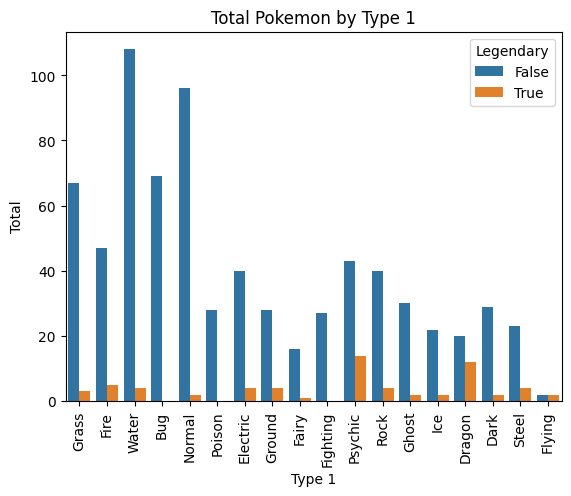

In [35]:
sns.set_color_codes("pastel")
plt.xticks(rotation = 90)
ax = sns.countplot(x='Type 1', hue = "Legendary", data=results3)
plt.xlabel('Type 1')
plt.ylabel('Total')
plt.title("Total Pokemon by Type 1")
print('\nMost Common Pokemon Type 1: Grass, Water, Normal, Bug\n')


Most Common Pokemon Type 2: Flying, Poison, Dragon, Psychic



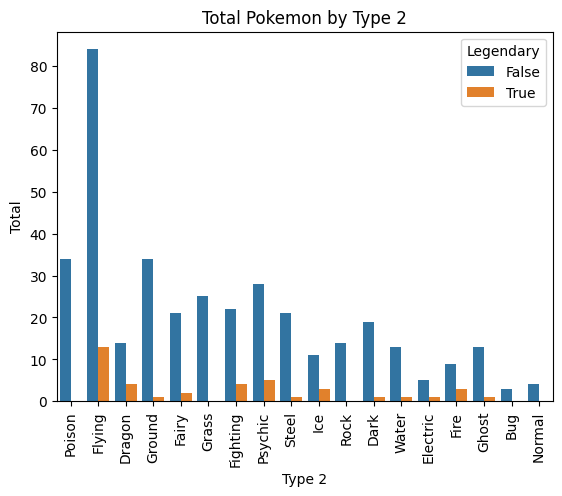

In [36]:
ax = sns.countplot(x="Type 2", hue = "Legendary", data = results3)
plt.xticks(rotation = 90)
plt.xlabel('Type 2')
plt.ylabel('Total')
plt.title('Total Pokemon by Type 2')

print('\nMost Common Pokemon Type 2: Flying, Poison, Dragon, Psychic\n')